<a href="https://colab.research.google.com/github/Fairuza12/AI-Lab-Assignments/blob/main/Face_Mask_detect_using_OpenCV_Tanzim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [ ]:
# Access dataset of google drive from colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import required libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Read first image and show it**

In [ ]:
#Reading image from google drive
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Dataset/Face Mask/00000_Mask.jpg")

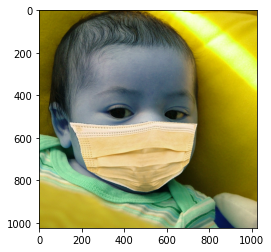

In [ ]:
#Image with distorted color
plt.imshow(image)

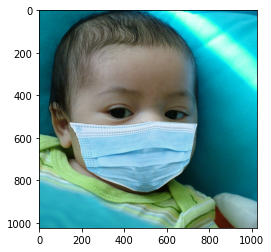

In [ ]:
#Image with actual color
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
image.shape

(1024, 1024, 3)

**Generating image one by one at once, with or without mask**

In [ ]:
Directory = "/content/drive/MyDrive/Colab Notebooks/Dataset"

In [ ]:
Classes = ["Face Mask","No Mask"]

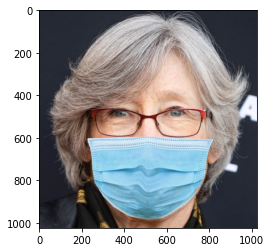

In [ ]:
for categories in Classes:
  path = os.path.join(Directory,categories)
  for img in os.listdir(path):
    image = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()
    #If no break statement executed, then first people people with face mask come then people with no face mask as arranged in Classes,
    #if classes are arranged in another order, images come in that order. If Classes = ["No Mask","Face Mask"] then first comes the people with no mask
    #then people with Face Mask
    break
    #One Person with face mask and one with no mask
  break
  #People with face mask in random order and one by one if the last break statement is executed only
  #If 2 break statements are executed, then one person with face mask comes

**For Deep Learning, we'll use ImageNet classifier**

In [ ]:
image_size = 224 # ImageNet -. 256 X 256

In [ ]:
new_image_array = cv2.resize(image,(image_size,image_size)) #New image with new size

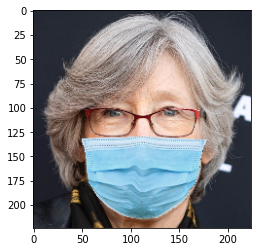

In [ ]:
plt.imshow(cv2.cvtColor(new_image_array,cv2.COLOR_BGR2RGB)) #Display resized image

Read images and convert into arrays to label correctly

In [ ]:
training_data = []

In [ ]:
def create_training_data():
  for categories in Classes:
    path = os.path.join(Directory,categories)
    label_class = Classes.index(categories)   # Label classes as Face mask and without mask through categories "Face Mask" and "No Mask"
    for img in os.listdir(path):
      try:
        image = cv2.imread(os.path.join(path,img))
        new_image_array = cv2.resize(image,(image_size,image_size))
        training_data.append([new_image_array, label_class]) # Runtime error if not written carefully
      except Exception as e:
        pass

In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

1897


In [ ]:
import random

In [ ]:
#We don't want to overfit data
random.shuffle(training_data)

In [ ]:
X = []  #data
y = []  #label
for features, labels in training_data:
  X.append(features)
  y.append(labels)
X = np.array(X).reshape(-1,image_size,image_size,3)

In [ ]:
X.shape

(1897, 224, 224, 3)

In [ ]:
#Normalize data
X = X/255.0

In [ ]:
print(len(training_data))

1897


**No face mask, output = 0    
 Face Mask,output = 1**

In [ ]:
print(y[0])
print(y[1000])

1
0


In [ ]:
Y = np.array(y)

In [ ]:
#Save training model and dump it using pickle
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#Reload model
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

**Deep Learning model for training:**
# Transfer Learning

In [ ]:
#Combining all the same stuffs together
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
#pre-trained model
model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
print(len(training_data))

1897


In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output =layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

**Binary Classification**

In [ ]:
new_model.compile(loss = "binary_crossentropy",optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X,Y,epochs = 1,validation_split = 0.1,batch_size=1)

1707/1707 [==============================] - 386s 226ms/step - loss: 0.0126 - accuracy: 0.9936 - val_loss: 5.4028 - val_accuracy: 0.4842


In [ ]:
new_model.save("my_model1.h5")

In [ ]:
new_model = tf.keras.models.load_model("f_model1 (2).h5")

**Check Network for Predictions**

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/Face Mask/00991_Mask.jpg')

NameError: ignored

In [ ]:
def getPred(image):
  new_model = tf.keras.models.load_model("f_model2.h5")
  frame = cv2.imread(image)
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in faces:
      roi_gray = gray[y:y+h,x:x+w]
      roi_color = frame[y:y+h,x:x+w]
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
      facess = faceCascade.detectMultiScale(roi_gray)
      if len(facess) == 0:
          print("Face not detcted")
      else:
          for (ex,ey,ew,eh) in facess:
              face_roi = roi_color[ey:ey+eh,ex: ex+ew]
  final_image = cv2.resize(face_roi,(224,224))
  final_image = np.expand_dims(final_image,axis=0)
  final_image = final_image/255.0
  Predictions = new_model.predict(final_image)

  return Predictions


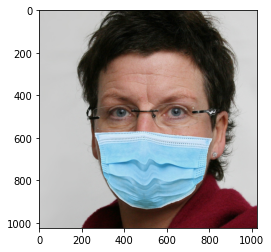

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
frame.shape


(1024, 1024, 3)

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(1024, 1024)

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detcted")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex: ex+ew]



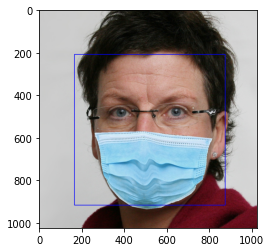

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

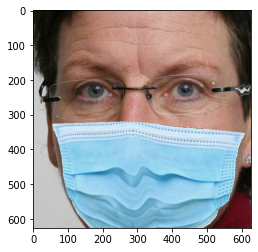

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
k = getPred("photo.jpg")

if k >= 0.85:
  print("No mask")
else:
  print("mask")

No mask


In [ ]:
if k >= 0.85:
  print("No mask")
else:
  print("mask")

No mask


**Video Demo**

In [ ]:
!pip install opencv-contrib-python
!pip install deepface

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 2.3 MB 17.4 MB/s 


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

k = getPred("photo.jpg")

if k >= 0.85:
  print("No mask")
else:
  print("mask")

KeyboardInterrupt: ignored

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
      if len(faces)!= 0:
        frame = img
        new_model = tf.keras.models.load_model("f_model1 (2).h5")
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detcted")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh,ex: ex+ew]
        final_image = cv2.resize(face_roi,(224,224))
        final_image = np.expand_dims(final_image,axis=0)
        final_image = final_image/255.0
        Predictions = new_model.predict(final_image)
        print(Predictions)


    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
!pip install streamlit

     |████████████████████████████████| 10.1 MB 5.2 MB/s 
     |████████████████████████████████| 111 kB 57.7 MB/s 
     |████████████████████████████████| 4.3 MB 32.1 MB/s 
     |████████████████████████████████| 164 kB 49.7 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 181 kB 35.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 46.2 MB/s 
     |████████████████████████████████| 428 kB 50.1 MB/s 
     |████████████████████████████████| 793 kB 49.8 MB/s 
     |████████████████████████████████| 130 kB 52.9 MB/s 
     |████████████████████████████████| 381 kB 42.2 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=a1456bcaf68b6b9bdc47df820540a9e19cecb25ec0afcca7bebafbf01195c093
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: 

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

In [ ]:
!pip install opencv-contrib-python
!pip install deepface

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 2.3 MB 12.3 MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import os
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/f_model1 (2).h5')
  return model
with st.spinner('Model is being loaded..'):
  new_model=load_model()
st.title("Face Mask Detection")

st.write("""
         Welcome to Face Mask Detection
         """
         )




def getPred(frame):


  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in faces:
      roi_gray = gray[y:y+h,x:x+w]
      roi_color = frame[y:y+h,x:x+w]
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
      facess = faceCascade.detectMultiScale(roi_gray)
      if len(facess) == 0:
          print("Face not detected")
      else:
          for (ex,ey,ew,eh) in facess:
              face_roi = roi_color[ey:ey+eh,ex: ex+ew]
  final_image = cv2.resize(face_roi,(224,224))
  final_image = np.expand_dims(final_image,axis=0)
  final_image = final_image/255.0
  Predictions = new_model.predict(final_image)

  return Predictions

b = st.selectbox('Select picture',('Pic_1','Pic_2','Pic_3','Pic_4','Pic_5','Pic_6','Pic_7','Pic_8','Pic_9','Pic_10'))
b1 = st.button('Click to Predict :')

if b=='Pic_1':
  frame = cv2.imread("stockMaks.jpg")
  st.image("stockMaks.jpg",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")
if b=='Pic_2':
  frame = cv2.imread("00995.png")
  st.image("00995.png",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")
if b=='Pic_3':
  frame = cv2.imread("f1.jpg")
  st.image("f1.jpg",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")
if b=='Pic_4':
  frame = cv2.imread("f2.jpg")
  st.image("f2.jpg",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")
if b=='Pic_5':
  frame = cv2.imread("00015_Mask.jpg")
  st.image("00015_Mask.jpg",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")

if b=='Pic_6':
  frame = cv2.imread("00089.png")
  st.image("00089.png",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")
if b=='Pic_7':
  frame = cv2.imread("00091_Mask.jpg")
  st.image("00091_Mask.jpg")
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")
if b=='Pic_8':
  frame = cv2.imread("00091.png")
  st.image("00091.png",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")

if b=='Pic_9':
  frame = cv2.imread("00021_Mask.jpg")
  st.image("00021_Mask.jpg",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")

if b=='Pic_10':
  frame = cv2.imread("00051.png")
  st.image("00051.png",width=400)
  if b1:
    k = getPred(frame)
    if k > 0.87:
      st.write("No Mask")
    else:
      st.write("Mask")



Overwriting app.py


In [ ]:
!ngrok config add-authtoken 28C8tKCOXAklwqQq01PUGbBR4MJ_7eWZaESyjQB8woTtPJjJZ

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

npx: installed 22 in 3.534s
your url is: https://pretty-chipmunk-65.loca.lt
^C


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
print(url)